In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *
from Methods.clearDataset import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [56]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

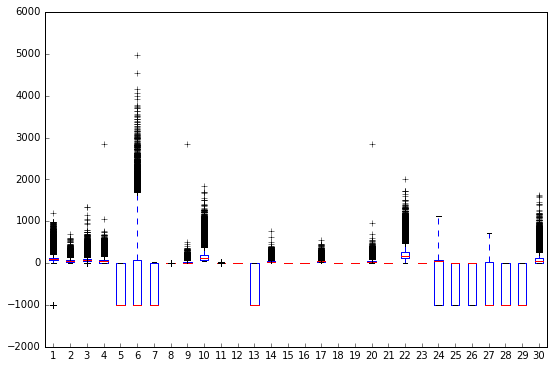

In [3]:
#Boxplot of the Raw Data
boxplot(tX, -2000, 6000, 'boxplot_original')

## Scatter plots

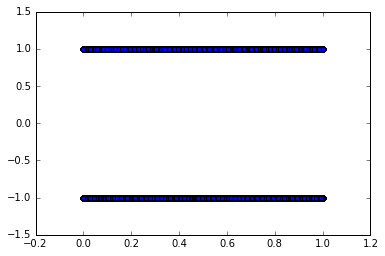

In [4]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [5]:
for i,col in zip(range(tX.T.shape[0]),tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    #print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


# Feature Processing

## Data scaling 

In [6]:
minima_tX = data_scaling(tX.T)

##### Boxplot of the scale data

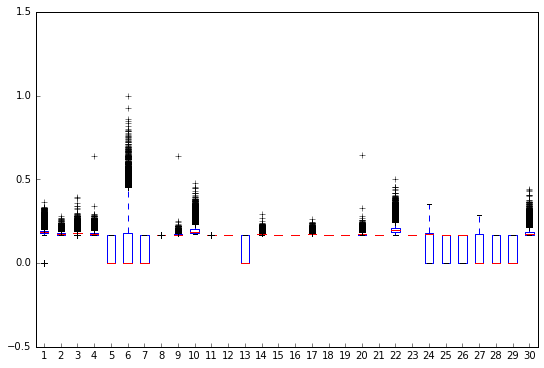

In [7]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [90]:
std_tX = data_standardization(tX.T)

##### Boxplot of the Standardized data

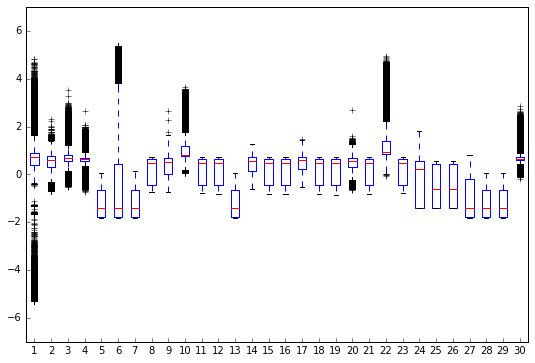

In [9]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

## Feature Deletion

In [34]:
PERCENT_FACTOR = 0.5
dele_tX_temp = deleteNoneWantedData(tX, PERCENT_FACTOR)
np_dele_tX_temp = np.array(dele_tX_temp)

conc = np.column_stack((y, np_dele_tX_temp))
conc_filtered = conc[~(conc == -999).any(1)]
y_cleaned = conc_filtered[:,0]
tX_cleaned = conc_filtered[:,1:]
#y_tX_temp = np.append(np.array([y]).T, dele_tX_temp, axis=1)
#dele_tX = deleteUnwantedLine(dele_tX_temp)

In [77]:
#dele_tX_temp[:10]
import sys
print(y_cleaned.shape)
print(tX_cleaned.shape)
corr_mat = np.corrcoef(np.delete(mean_tX, [2, 4, 29], 1).T)
np.savetxt(sys.stdout, corr_mat, '%5.2f')

(138096,)
(138096, 23)
 1.00  0.18  0.02 -0.01  0.01  0.45  0.01  0.12  0.07  0.02 -0.02  0.25  0.00 -0.00  0.32  0.00 -0.00  0.09 -0.00  0.08  0.01  0.01  0.00  0.01 -0.01  0.00 -0.00
 0.18  1.00 -0.25 -0.07  0.07  0.04  0.02 -0.15  0.35 -0.42 -0.06 -0.15 -0.00  0.00  0.31 -0.01  0.00  0.18 -0.02 -0.17 -0.21 -0.12  0.00  0.01 -0.02  0.00  0.00
 0.02 -0.25  1.00  0.12 -0.02 -0.54  0.31  0.83  0.09  0.54  0.01  0.41  0.00  0.01  0.36  0.01 -0.00  0.68  0.01  0.78  0.62  0.67  0.00  0.00  0.23  0.00 -0.01
-0.01 -0.07  0.12  1.00 -0.76 -0.06 -0.03  0.14 -0.04  0.07  0.48  0.08 -0.00  0.00  0.02 -0.00 -0.00  0.09  0.00  0.10 -0.02  0.22 -0.00  0.00  0.24 -0.00 -0.00
 0.01  0.07 -0.02 -0.76  1.00  0.01  0.08  0.01  0.04 -0.05 -0.56 -0.03  0.00  0.00  0.03  0.00  0.00  0.01  0.00  0.03  0.03 -0.02 -0.00 -0.00  0.00 -0.00  0.00
 0.45  0.04 -0.54 -0.06  0.01  1.00 -0.15 -0.43  0.05 -0.21 -0.01 -0.20  0.00 -0.01 -0.07  0.00 -0.00 -0.40 -0.00 -0.41 -0.35 -0.37 -0.00  0.01 -0.13  0.00  0.00
 0.01

## Replace Undefined variables by mean of all the other variables

In [91]:
mean_tX = np.array(averageData(tX))
mean_std_tX = np.array(averageData(std_tX))

In [59]:
tX[1]

array([  1.60937000e+02,   6.87680000e+01,   1.03235000e+02,
         4.81460000e+01,   2.40373503e+00,   3.71783360e+02,
        -8.21688171e-01,   3.47300000e+00,   2.07800000e+00,
         1.25157000e+02,   8.79000000e-01,   1.41400000e+00,
         4.58289801e-01,   4.20140000e+01,   2.03900000e+00,
        -3.01100000e+00,   3.69180000e+01,   5.01000000e-01,
         1.03000000e-01,   4.47040000e+01,  -1.91600000e+00,
         1.64546000e+02,   1.00000000e+00,   4.62260000e+01,
         7.25000000e-01,   1.15800000e+00,   5.76794744e+01,
        -1.18452642e-02,  -1.58228913e-03,   4.62260000e+01])

## Polynomial Transformation

### Polynome

### Squared

In [134]:
tx_squares = build_poly_matrix(remove_tX, 1)

### Sqrt

## Other Transformations

### Log

### Suppress some col

In [81]:
mean_sup = np.delete(mean_tX, [2, 4, 29], 1)
print(mean_sup.shape)

(250000, 27)


## Model Selection

### Least Squares

In [93]:
def compute_vif(X):
    VIF = []
    for j in range(X.shape[1]):
        col = X[:, j]
        inv_mat = np.linalg.inv(np.dot(X.T, X))
        vif_j = np.dot(col.T, col) * inv_mat[j, j]
        VIF.append(vif_j)
    return VIF

In [109]:
mse, w = least_squares(y, tX)
print(mse)
mse_m, w_m = least_squares(y, np.delete(mean_tX, [4, 9, 13, 29], 1))
print(mse_m)
remove_tX = np.delete(mean_tX, [4, 9, 13, 29], 1)
remove_tX.shape

0.343815196862
0.351869823451
[19.932239114830107, 6.7223650609378796, 24.14130767984582, 16.105864324646408, 11.597293422867009, 3.3882551894598718, 20.487202290760155, 2.3139864294631609, 11.643618464423733, 1.9258993220880016, 7.312478318210907, 1.4637581705701248, 1.0965399789345887, 24.984759086899505, 1.47407368678161, 1.1360821082816663, 9.2667129603425309, 1.0621903607865417, 21.238360038382236, 5.9555546982174956, 13.321863310010302, 1.0739765271564181, 1.1628952430136155, 16.596156355350448, 1.0427646988231343, 1.0246016140790548]


(250000, 26)

### Ridge Regression

In [12]:
w_ridge = ridge_regression(y, tX_tra, 1)
print(w_ridge)

[  2.60587944e-04  -9.09041953e-03  -2.05593759e-03  -2.07372712e-03
   4.16112294e-04   5.56555764e-04  -8.63582277e-03   1.49220972e-02
   8.84108509e-05   3.01001515e-03  -1.36439197e-02   2.91963352e-02
   5.90347247e-03   6.34020163e-03  -2.47827750e-04  -1.03790696e-03
   2.15291139e-03  -3.16656538e-04   7.13755800e-04   4.85803562e-03
   3.40155651e-04  -7.69669008e-04  -1.27454270e-02   1.51646839e-03
  -7.80900128e-04  -5.87028123e-04   3.16780195e-04   1.29177964e-03
   3.04952725e-04  -5.48271055e-03]


### Least squares Gradient Descent

### Least squares Stochastique Gradient Descent

### Logistic regression (does not work)

In [133]:
from Methods.logistic import *
y_binary = np.copy(y)
y_binary[y_binary == -1] = 0
print(y_binary[:20])
#logistic_regression_gradient_descent_demo(y_binary, mean_std_tX)

[ 1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.]


### Reg logistic regression

## Verification

### Cross Validation

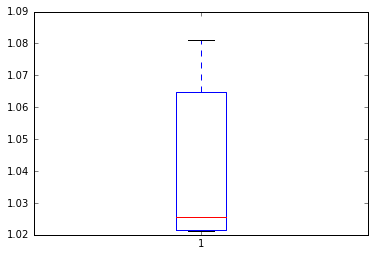

[1.0213324630109435, 1.0213167970811017, 1.0213402958857543, 1.0213872918731659, 1.0214107890559998, 1.0215987470626617, 1.0217475226297348, 1.0220215261920857, 1.0226162525600695, 1.0241562380808895, 1.027089090585622, 1.0338123620851125, 1.043064715154338, 1.0536413051888198, 1.0631425116135653, 1.0699383159790101, 1.0740204839759808, 1.077359735650075, 1.0792219419563336, 1.0809699348270516]


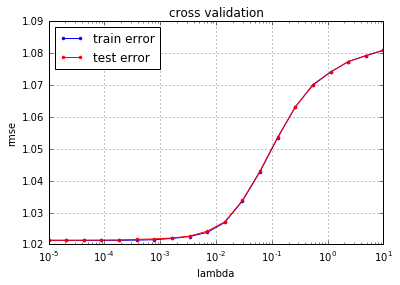

In [135]:
#Data split for the tests
#x_tr, y_tr, x_te, y_te = split_data(tX, y, 0.4)

cross_validation_demo(y, tx_squares)


###  Bias-Variance decomposition

### Binary Classification

In [ ]:
#Use predict_labels de project helpers (fait la multiplication entre tX et les w)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)